# Mid-Course Project | Exploratory Data Analysis

I have two slightly different datasets containing chess matches.

FICS contains a set of games payed between humans as well as humans and computers. The data export contains all games played on FICS.org in January 2021.

Lichess contains a set of games played between humans at a wider range of abilities. The data export contains all games played on lichess.org in December 2013.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Selecting columns

The datasets contain the following columns:

Both:
- match - an arbitrary index created during the data preparation phase
- Black - the username of the Black player
- BlackElo - the rating of Black https://www.chess.com/terms/elo-rating-chess
- BlackRD / BlackRatingDiff - an indicator of the variablility in Black's ELO
- Date / UTCDate - the date of the game
- ECO - a standardised descriptor of the opening sequence https://www.365chess.com/eco.php
- Event - the type of game, rated/unrated and it's format
- Movetext - the sequence of moves played
- Result - 1-0 White win / 0.5-0.5 draw / 0-1 Black win
- Site - data source
- Time / UTCTime - the time of the game start
- TimeControl - the starting time given to each player in seconds + the bonus time gained in seconds after each move
- White - the username of the White player
- WhiteElo - the rating of White
- WhiteRD / WhiteRatingDiff - an indicator of the variablility in White's ELO

fics only:
- BlackClock - the amount of time that Black started with
- BlackIsComp - an indicator that Black is a computer bot
- FICSGamesDBGameNo - the FICS database game number
- PlyCount - the number of moves taken
- WhiteClock - the amount of time that White started with
- WhiteIsComp - an indicator that White is a computer bot

lichess only:
- BlackTitle - Black's master level title, if gained
- Opening - a description of the ECO field
- Termination - how the game ended
- WhiteTitle - White's master level title, if gained

In [58]:
fics = pd.read_csv('./Processed Data/data_fics2_prepared.csv')
display(fics.head())
fics.shape

C:\Users\eliza\AppData\Local\Temp\ipykernel_17692\2807151115.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  fics = pd.read_csv('./Processed Data/data_fics2_prepared.csv')


,match,Black,BlackClock,BlackElo,BlackIsComp,BlackRD,Date,ECO,Event,FICSGamesDBGameNo,...,Result,Site,Time,TimeControl,Variant,White,WhiteClock,WhiteElo,WhiteIsComp,WhiteRD
0,0,AlexBaban,0:05:00.000,1696,NaN,48.0,2018.01.31,A00,FICS rated blitz game,430765295,...,1-0,FICS freechess.org,23:52:00,300+0,NaN,jaromsal,0:05:00.000,1704,NaN,18.0
1,1,youngwalrus,0:12:00.000,1818,NaN,36.9,2018.01.31,D06,FICS rated standard game,430765294,...,0-1,FICS freechess.org,23:29:00,720+10,NaN,Uris,0:12:00.000,1679,NaN,40.7
2,2,wollongong,0:03:00.000,1495,NaN,33.6,2018.01.31,B07,FICS rated blitz game,430765293,...,1-0,FICS freechess.org,23:54:00,180+0,NaN,Eraza,0:03:00.000,1553,NaN,17.6
3,3,steward,0:15:00.000,1470,NaN,32.2,2018.01.31,D06,FICS rated standard game,430765292,...,1-0,FICS freechess.org,23:53:00,900+0,NaN,malotfi,0:15:00.000,1422,NaN,140.5
4,4,JosephAquilino,0:01:00.000,1410,NaN,32.4,2018.01.31,C44,FICS rated blitz game,430765291,...,1-0,FICS freechess.org,23:44:00,60+10,NaN,TipZilla,0:01:00.000,1264,NaN,42.6


(753543, 22)

In [59]:
fics.columns

Index(['match', 'Black', 'BlackClock', 'BlackElo', 'BlackIsComp', 'BlackRD',
       'Date', 'ECO', 'Event', 'FICSGamesDBGameNo', 'Movetext', 'PlyCount',
       'Result', 'Site', 'Time', 'TimeControl', 'Variant', 'White',
       'WhiteClock', 'WhiteElo', 'WhiteIsComp', 'WhiteRD'],
      dtype='object')

The fics dataset contains 753543 games.

There is redundant information to remove before analysis (see workings below):

'match', 'Black', 'Site', 'White' and 'FICSGamesDBGameNo' do not contain useful information. 'BlackClock' and 'WhiteClock' contain information already encoded within 'TimeControl'. These can all be removed.

'BlackIsComp' can only ever be True when 'WhiteIsComp' is False and vice versa. There are rows where both are not True. Therefore these two columns can be consolidated into one.

In [60]:
fics.groupby(['Event','TimeControl','WhiteClock','BlackClock']).agg({'match':pd.Series.nunique})

match
Event                      TimeControl WhiteClock  BlackClock        
FICS rated blitz game      0+10        0:10.000    0:10.000        68
                           0+12        0:10.000    0:10.000        95
                           0+14        0:10.000    0:10.000         2
                           0+15        0:10.000    0:10.000        77
                           0+17        0:10.000    0:10.000        10
...                                                               ...
FICS unrated standard game 900+20      0:15:00.000 0:15:00.000      2
                           900+3       0:15:00.000 0:15:00.000      6
                           900+30      0:15:00.000 0:15:00.000     16
                           900+5       0:15:00.000 0:15:00.000    159
FICS unrated untimed game  0+0         0.000       0.000            8

[523 rows x 1 columns]

In [61]:
fics[fics['BlackClock']!=fics['WhiteClock']]

,match,Black,BlackClock,BlackElo,BlackIsComp,BlackRD,Date,ECO,Event,FICSGamesDBGameNo,...,Result,Site,Time,TimeControl,Variant,White,WhiteClock,WhiteElo,WhiteIsComp,WhiteRD


In [62]:
fics['Site'].value_counts()

FICS freechess.org    753543
Name: Site, dtype: int64

In [63]:
display(len(fics))
display(len(fics[fics['BlackIsComp']=='Yes']))
display(len(fics[fics['WhiteIsComp']=='Yes']))
display(len(fics[(fics['BlackIsComp']=='Yes')&(fics['WhiteIsComp']=='Yes')]))

753543

41510

41035

2045

In [64]:
fics = fics.drop(['match', 'Black', 'Site', 'White','FICSGamesDBGameNo','BlackClock','WhiteClock'],axis=1)
fics.head()

,BlackElo,BlackIsComp,BlackRD,Date,ECO,Event,Movetext,PlyCount,Result,Time,TimeControl,Variant,WhiteElo,WhiteIsComp,WhiteRD
0,1696,NaN,48.0,2018.01.31,A00,FICS rated blitz game,1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...,65,1-0,23:52:00,300+0,NaN,1704,NaN,18.0
1,1818,NaN,36.9,2018.01.31,D06,FICS rated standard game,1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...,68,0-1,23:29:00,720+10,NaN,1679,NaN,40.7
2,1495,NaN,33.6,2018.01.31,B07,FICS rated blitz game,1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...,77,1-0,23:54:00,180+0,NaN,1553,NaN,17.6
3,1470,NaN,32.2,2018.01.31,D06,FICS rated standard game,1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...,33,1-0,23:53:00,900+0,NaN,1422,NaN,140.5
4,1410,NaN,32.4,2018.01.31,C44,FICS rated blitz game,1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...,83,1-0,23:44:00,60+10,NaN,1264,NaN,42.6


In [65]:
fics['BlackIsComp'] = fics['BlackIsComp'].fillna(0)
fics['WhiteIsComp'] = fics['WhiteIsComp'].fillna(0)
fics['Computer']=0

i=0
while i < len(fics):
    if ((fics['BlackIsComp'][i] == 'Yes') & (fics['WhiteIsComp'][i] == 'Yes')):
        fics['Computer'][i] = 'Both'
    elif fics['BlackIsComp'][i] == 'Yes':
        fics['Computer'][i] = 'Black'
    elif fics['WhiteIsComp'][i] == 'Yes':
        fics['Computer'][i] = 'White'
    else:
        fics['Computer'][i] = 'None'
    i = i+1

fics = fics.drop(['BlackIsComp','WhiteIsComp'],axis=1)
fics.head()

C:\Users\eliza\AppData\Local\Temp\ipykernel_17692\239566813.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fics['Computer'][i] = 'None'


,BlackElo,BlackRD,Date,ECO,Event,Movetext,PlyCount,Result,Time,TimeControl,Variant,WhiteElo,WhiteRD,Computer
0,1696,48.0,2018.01.31,A00,FICS rated blitz game,1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...,65,1-0,23:52:00,300+0,NaN,1704,18.0,None
1,1818,36.9,2018.01.31,D06,FICS rated standard game,1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...,68,0-1,23:29:00,720+10,NaN,1679,40.7,None
2,1495,33.6,2018.01.31,B07,FICS rated blitz game,1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...,77,1-0,23:54:00,180+0,NaN,1553,17.6,None
3,1470,32.2,2018.01.31,D06,FICS rated standard game,1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...,33,1-0,23:53:00,900+0,NaN,1422,140.5,None
4,1410,32.4,2018.01.31,C44,FICS rated blitz game,1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...,83,1-0,23:44:00,60+10,NaN,1264,42.6,None


In [66]:
fics.dtypes

BlackElo         int64
BlackRD        float64
Date            object
ECO             object
Event           object
Movetext        object
PlyCount         int64
Result          object
Time            object
TimeControl     object
Variant         object
WhiteElo         int64
WhiteRD        float64
Computer        object
dtype: object

In [67]:
fics['Date'] = pd.to_datetime(fics['Date'])
fics['Time'] = pd.to_datetime(fics['Time']).dt.time
print(fics.dtypes)
fics.head()

BlackElo                int64
BlackRD               float64
Date           datetime64[ns]
ECO                    object
Event                  object
Movetext               object
PlyCount                int64
Result                 object
Time                   object
TimeControl            object
Variant                object
WhiteElo                int64
WhiteRD               float64
Computer               object
dtype: object


,BlackElo,BlackRD,Date,ECO,Event,Movetext,PlyCount,Result,Time,TimeControl,Variant,WhiteElo,WhiteRD,Computer
0,1696,48.0,2018-01-31,A00,FICS rated blitz game,1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...,65,1-0,23:52:00,300+0,NaN,1704,18.0,None
1,1818,36.9,2018-01-31,D06,FICS rated standard game,1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...,68,0-1,23:29:00,720+10,NaN,1679,40.7,None
2,1495,33.6,2018-01-31,B07,FICS rated blitz game,1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...,77,1-0,23:54:00,180+0,NaN,1553,17.6,None
3,1470,32.2,2018-01-31,D06,FICS rated standard game,1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...,33,1-0,23:53:00,900+0,NaN,1422,140.5,None
4,1410,32.4,2018-01-31,C44,FICS rated blitz game,1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...,83,1-0,23:44:00,60+10,NaN,1264,42.6,None


In [68]:
fics.isna().sum()

BlackElo            0
BlackRD             0
Date                0
ECO                 8
Event               0
Movetext            0
PlyCount            0
Result              0
Time                0
TimeControl         0
Variant        753535
WhiteElo            0
WhiteRD             0
Computer            0
dtype: int64

In [69]:
fics['Variant'].value_counts()

untimed    8
Name: Variant, dtype: int64

In [70]:
fics = fics.drop(['Variant'],axis=1)

The fics dataset now looks to be ready for our preliminary investigation.

Similarly, we can import and prepare the lichess dataset.

In [ ]:
lichess = pd.read_csv('./Processed Data/data_lichess_prepared.csv')
display(lichess.head())
lichess.shape

The lichess dataset contains 578262 games.

There is redundant information to remove before analysis (see workings below):

'match', 'Black', 'Site', and 'White' do not contain useful information. These can all be removed.

'ECO' and 'Opening' contain overlapping but not identical information, so I will leave both in.

'BlackTitle' and 'WhiteTitle' contain many nulls.

In [ ]:
print(len(lichess))
lichess.isna().sum()

In [ ]:
lichess = lichess.drop(['match', 'Black', 'Site', 'White'],axis=1)
lichess['BlackTitle'] = lichess['BlackTitle'].fillna('None')
lichess['WhiteTitle'] = lichess['WhiteTitle'].fillna('None')
lichess.head()

In [ ]:
lichess.dtypes

In [ ]:
lichess['BlackElo'] = pd.to_numeric(lichess['BlackElo'], errors='coerce')
lichess['WhiteElo'] = pd.to_numeric(lichess['WhiteElo'], errors='coerce')
lichess['UTCDate'] = pd.to_datetime(lichess['UTCDate'])
lichess['UTCTime'] = pd.to_datetime(lichess['UTCTime']).dt.time
display(lichess.dtypes)
lichess.head()

### Data Transformation

In [71]:
fics['ELODifference'] = fics['WhiteElo'] - fics['BlackElo']

fics['Pair01'] = fics['Movetext'].apply(lambda st: st[st.find('1.')+3:st.find(' 2.')])
fics['Pair02'] = fics['Movetext'].apply(lambda st: st[st.find('2.')+3:st.find(' 3.')])
fics['Pair03'] = fics['Movetext'].apply(lambda st: st[st.find('3.')+3:st.find(' 4.')])
fics['Pair04'] = fics['Movetext'].apply(lambda st: st[st.find('4.')+3:st.find(' 5.')])

fics.head()

,BlackElo,BlackRD,Date,ECO,Event,Movetext,PlyCount,Result,Time,TimeControl,WhiteElo,WhiteRD,Computer,ELODifference,Pair01,Pair02,Pair03,Pair04
0,1696,48.0,2018-01-31,A00,FICS rated blitz game,1. b4 d5 2. Bb2 Bf5 3. e3 Nf6 4. Ne2 g6 5. a4 ...,65,1-0,23:52:00,300+0,1704,18.0,None,8,b4 d5,Bb2 Bf5,e3 Nf6,Ne2 g6
1,1818,36.9,2018-01-31,D06,FICS rated standard game,1. d4 d5 2. c4 Nf6 3. Nf3 Bf5 4. Qb3 Nfd7 5. c...,68,0-1,23:29:00,720+10,1679,40.7,None,-139,d4 d5,c4 Nf6,Nf3 Bf5,Qb3 Nfd7
2,1495,33.6,2018-01-31,B07,FICS rated blitz game,1. e4 d6 2. Nf3 Nd7 3. Bb5 c6 4. Be2 Ngf6 5. d...,77,1-0,23:54:00,180+0,1553,17.6,None,58,e4 d6,Nf3 Nd7,Bb5 c6,Be2 Ngf6
3,1470,32.2,2018-01-31,D06,FICS rated standard game,1. d4 d5 2. c4 Bf5 3. Nc3 dxc4 4. Bf4 Nc6 5. a...,33,1-0,23:53:00,900+0,1422,140.5,None,-48,d4 d5,c4 Bf5,Nc3 dxc4,Bf4 Nc6
4,1410,32.4,2018-01-31,C44,FICS rated blitz game,1. e4 e5 2. Nf3 Nc6 3. h3 h6 4. a3 Nf6 5. Nc3 ...,83,1-0,23:44:00,60+10,1264,42.6,None,-146,e4 e5,Nf3 Nc6,h3 h6,a3 Nf6


In [72]:
fics.describe(include = 'all').T

C:\Users\eliza\AppData\Local\Temp\ipykernel_17692\3682456914.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  fics.describe(include = 'all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
BlackElo,753543.0,NaN,NaN,NaN,NaT,NaT,1574.41238,259.125779,516.0,1399.0,1562.0,1733.0,3292.0
BlackRD,753543.0,NaN,NaN,NaN,NaT,NaT,33.869977,29.459694,0.0,23.2,27.8,34.8,350.0
Date,753543,418,2018-01-07 00:00:00,26948,2003-01-03,2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ECO,753535,496,A00,50503,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Event,753543,7,FICS rated blitz game,577413,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movetext,753543,740758,{White forfeits by disconnection} 0-1,1904,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlyCount,753543.0,NaN,NaN,NaN,NaT,NaT,70.205643,31.353611,0.0,49.0,67.0,89.0,600.0
Result,753543,3,1-0,372897,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,753543,1440,13:18:00,848,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TimeControl,753543,394,180+0,309913,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
movetext = fics['Movetext'].value_counts()
movetext.head(50)

 {White forfeits by disconnection} 0-1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1904
 {Black forfeits by disconnection} 1-0                                                                                                                                                                                                                                                                                                                                                                                                        

In [105]:
fics[fics['Movetext'].str.contains('disconnection')]
fics[(fics['Movetext'].str.contains('resigns'))&(fics['PlyCount']<5)]

,BlackElo,BlackRD,Date,ECO,Event,Movetext,PlyCount,Result,Time,TimeControl,WhiteElo,WhiteRD,Computer,ELODifference,Pair01,Pair02,Pair03,Pair04,score
212,1079,46.2,2018-01-31,B01,FICS unrated blitz game,1. e4 d5 2. exd5 Qxd5 {White resigns} 0-1,4,0-1,23:36:00,180+0,1872,43.9,None,793,e4 d5,exd5 Qxd5 {White resigns} 0-,e4 d5 2. exd5 Qxd5 {White resigns} 0-,e4 d5 2. exd5 Qxd5 {White resigns} 0-,0.0
326,1247,38.9,2018-01-31,A04,FICS rated standard game,1. Nf3 {Black resigns} 1-0,1,1-0,23:25:00,900+0,1503,27.8,White,256,Nf3 {Black resigns} 1-,Nf3 {Black resigns} 1-,Nf3 {Black resigns} 1-,Nf3 {Black resigns} 1-,1.0
739,1336,21.4,2018-01-31,C40,FICS rated blitz game,1. e4 e5 2. Nf3 {Black resigns} 1-0,3,1-0,22:43:00,300+3,1446,34.8,None,110,e4 e5,Nf3 {Black resigns} 1-,e4 e5 2. Nf3 {Black resigns} 1-,e4 e5 2. Nf3 {Black resigns} 1-,1.0
1322,1156,28.7,2018-01-31,C00,FICS rated blitz game,1. e4 e6 {White resigns} 0-1,2,0-1,21:53:00,120+3,1126,26.5,None,-30,e4 e6 {White resigns} 0-,e4 e6 {White resigns} 0-,e4 e6 {White resigns} 0-,e4 e6 {White resigns} 0-,0.0
1361,1429,60.2,2018-01-31,A40,FICS rated blitz game,1. d4 {Black resigns} 1-0,1,1-0,21:50:00,300+0,1952,19.7,White,523,d4 {Black resigns} 1-,d4 {Black resigns} 1-,d4 {Black resigns} 1-,d4 {Black resigns} 1-,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752669,1214,51.5,2018-01-01,A40,FICS rated blitz game,1. d4 {Black resigns} 1-0,1,1-0,02:01:00,300+0,2017,26.6,White,803,d4 {Black resigns} 1-,d4 {Black resigns} 1-,d4 {Black resigns} 1-,d4 {Black resigns} 1-,1.0
752934,1720,350.0,2018-01-01,B00,FICS unrated standard game,1. e4 {Black resigns} 1-0,1,1-0,01:25:00,1200+0,1372,61.6,None,-348,e4 {Black resigns} 1-,e4 {Black resigns} 1-,e4 {Black resigns} 1-,e4 {Black resigns} 1-,1.0
752960,1261,25.5,2018-01-01,A00,FICS rated blitz game,1. g3 Nc6 {Black resigns} 1-0,2,1-0,01:22:00,180+0,1386,25.2,None,125,g3 Nc6 {Black resigns} 1-,g3 Nc6 {Black resigns} 1-,g3 Nc6 {Black resigns} 1-,g3 Nc6 {Black resigns} 1-,1.0
753016,1478,29.4,2018-01-01,A40,FICS rated standard game,1. d4 {White resigns} 0-1,1,0-1,01:16:00,1200+0,1476,71.0,None,-2,d4 {White resigns} 0-,d4 {White resigns} 0-,d4 {White resigns} 0-,d4 {White resigns} 0-,0.0


In [88]:
fics['score']=fics['Result'].replace({'1-0':1,'1/2-1/2':0.5,'0-1':0})
fics['score']

0         1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
753538    0.0
753539    0.0
753540    0.0
753541    0.0
753542    1.0
Name: score, Length: 753543, dtype: float64

In [75]:
categorical_df = fics.select_dtypes(object).copy()
numerical_df = fics.select_dtypes(np.number).copy()

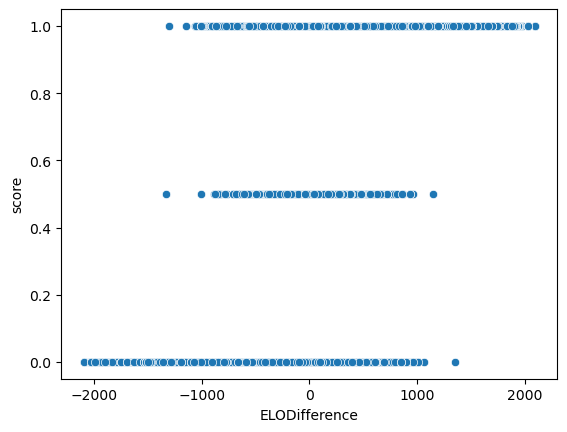

In [89]:
sns.scatterplot(fics,x='ELODifference',y='score')
plt.show()

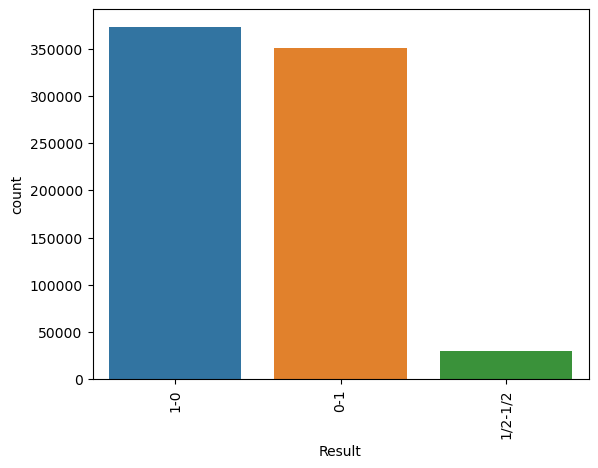

In [86]:
sns.countplot(data=fics, x=fics['Result'])
plt.xticks(rotation = 90)
plt.show()

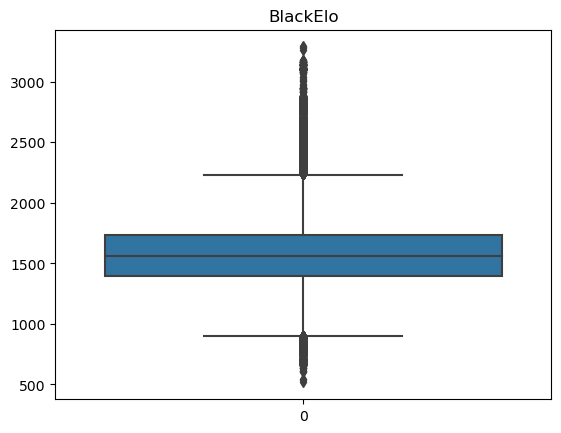

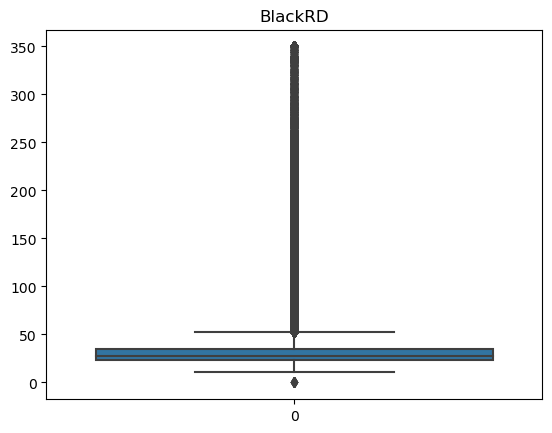

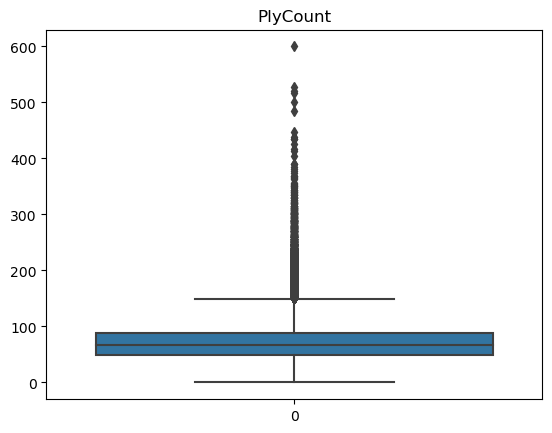

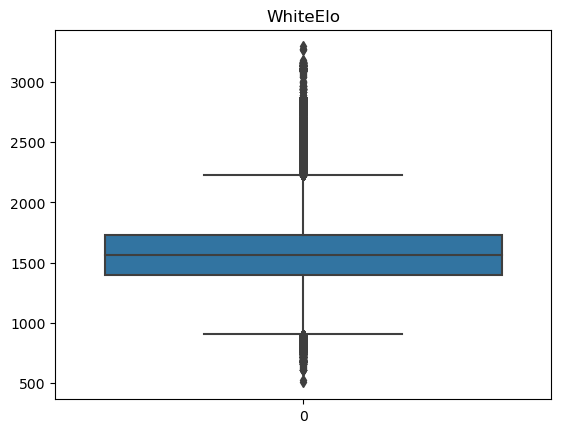

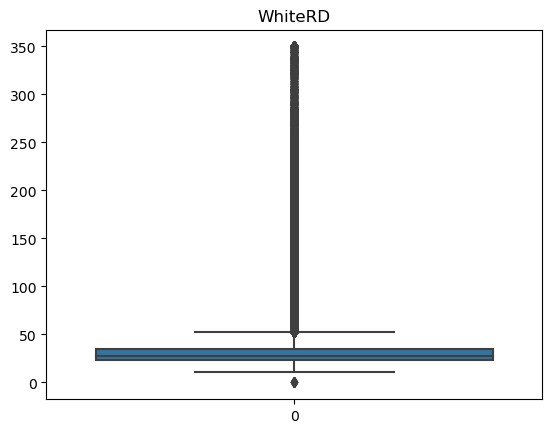

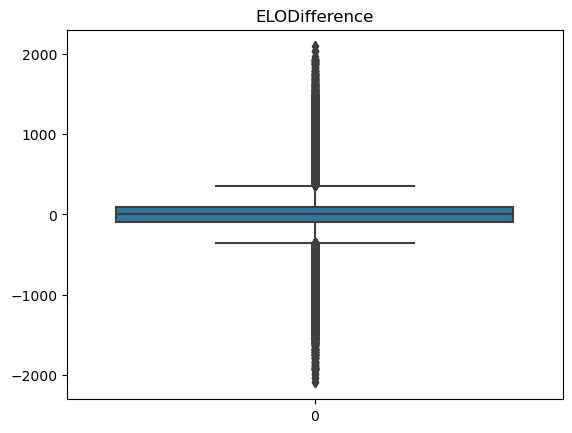

In [79]:
def boxplot_df(df):
    for col in df.columns:
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

boxplot_df(numerical_df)

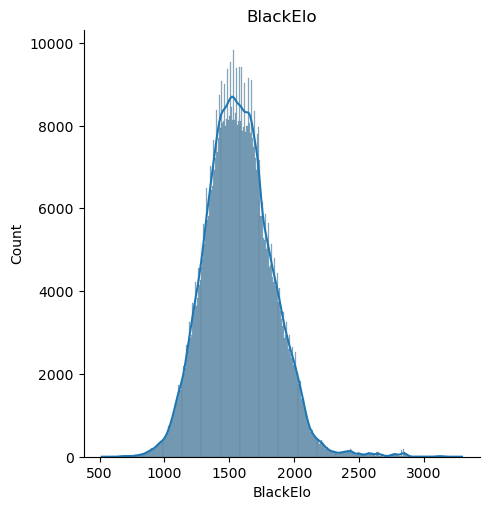

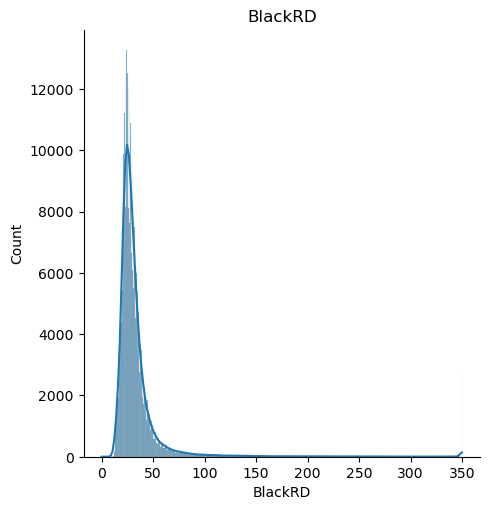

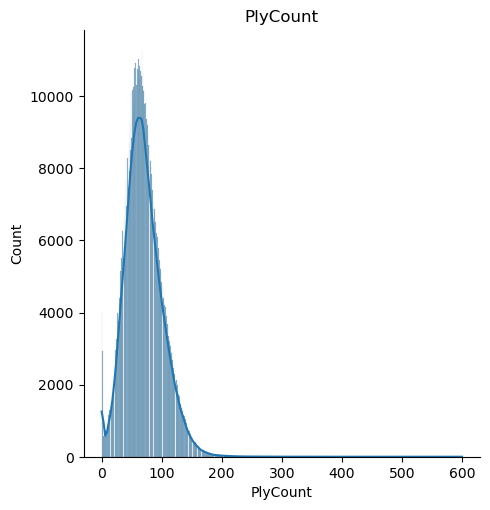

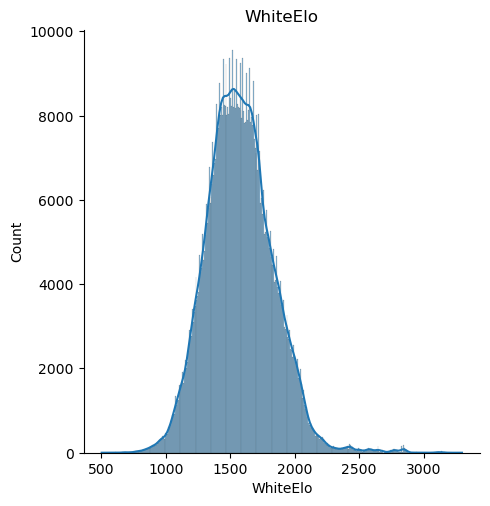

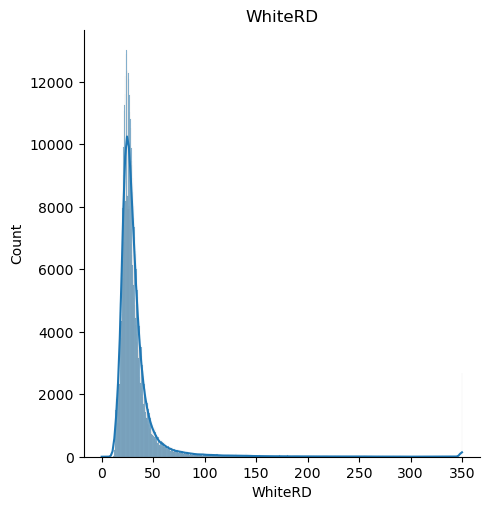

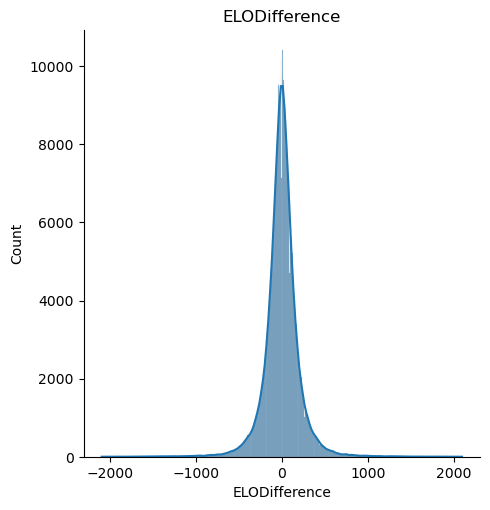

In [90]:
def plot_df(df):
    for col in df.columns:
        sns.displot(df[col], kde=True)
        plt.title(col)
        plt.show()

plot_df(numerical_df)